In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve, auc, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

In [2]:
df = np.genfromtxt('californiabin.csv', delimiter=',')
df = pd.DataFrame(df)

In [3]:
df.shape

(3000, 9)

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [6]:
def arrange_pows(init, end):
    arr = []
    for i in range(init, end + 1):
        arr.append(2 ** i)
    return arr
def print_metrics(name, y_test, y_pred):
    print("Metrics for {}".format(name))
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}".format(precision_score(y_test, y_pred)))
    print("Recall: {}".format(recall_score(y_test, y_pred)))
    print("F1: {}".format(f1_score(y_test, y_pred)))
    print("------------\n")

def plot_roc_curve(_y_test, _y_score):
    fpr, tpr, _ = roc_curve(_y_test.ravel(), _y_score.ravel())
    auc_score = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % auc_score,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

In [7]:
## SVM GRID

In [8]:
parameters = {'kernel':['rbf'], 'C':arrange_pows(-5, 15), 'gamma': arrange_pows(-15, 3)}
svc = SVC()
clf_svm = GridSearchCV(svc, parameters, n_jobs=-1, cv=10)
svm_grid = clf_svm.fit(X_train, y_train)

In [9]:
## Random Forest Grid

In [10]:
parameters = {'n_estimators': np.linspace(10, 200, num=int(200/10), dtype=int), 'max_depth': [2,4,6,8,None]}
rfc = RandomForestClassifier()
clf_rfc = GridSearchCV(rfc, parameters, n_jobs=-1, cv=10)
rfc_grid = clf_rfc.fit(X_train, y_train)

Metrics for SVM
Accuracy: 0.7977777777777778
Precision: 0.8123620309050773
Recall: 0.7913978494623656
F1: 0.8017429193899782
------------



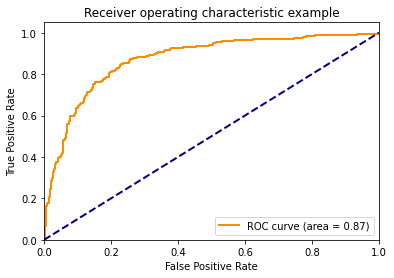

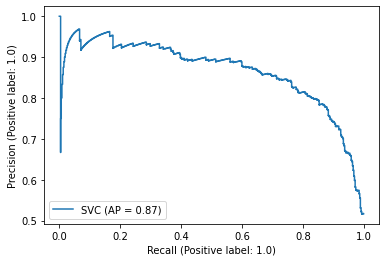

In [11]:
svm = svm_grid.best_estimator_.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print_metrics("SVM", y_test, y_pred)
y_score = svm.decision_function(X_test)
plot_roc_curve(y_test, y_score)
PrecisionRecallDisplay.from_estimator(svm, X_test, y_test)

Metrics for RandomForest
Accuracy: 0.8588888888888889
Precision: 0.8706140350877193
Recall: 0.853763440860215
F1: 0.8621064060803475
------------



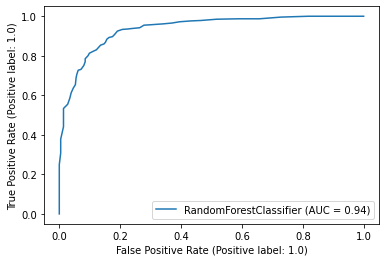

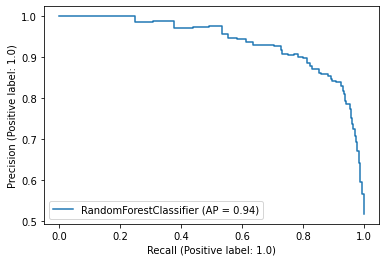

In [12]:
rfc = rfc_grid.best_estimator_.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print_metrics("RandomForest", y_test, y_pred)
RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()
PrecisionRecallDisplay.from_estimator(rfc, X_test, y_test)
plt.show()